# Tabular data: Readmission 30 days

Goal: check different approaches from classic to more recent DL in structured datasets.

Methods:
- Logistic regression
- Random forest
- XGBoost
- TabPFN
Dataset:
- Titanic (Kaggle)

In [1]:
!pip install tabpfn
!pip install pygam
!pip install ppscore

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from  sklearn.preprocessing import PowerTransformer
from  sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tabpfn import TabPFNClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import time  
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from pygam import LinearGAM, s, f
import ppscore as pps
import xgboost as xgb
%matplotlib inline

In [3]:
full = pd.read_csv('data/aou_dl/dmtrain.rb.iter1.csv', header = 0, dtype={'s.age': np.float64})
holdout  = pd.read_csv('data/aou_dl/dmvalid.rb.iter1.csv' , header = 0, dtype={'s.age': np.float64})
merged = pd.concat([full, holdout])

print (merged.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82188 entries, 0 to 24659
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   82188 non-null  int64  
 1   race3                82188 non-null  int64  
 2   s.age                82188 non-null  float64
 3   sex_at_birthFemale   82188 non-null  int64  
 4   sex_at_birthMale     82188 non-null  int64  
 5   race3White_EA        82188 non-null  int64  
 6   race3Asian           82188 non-null  int64  
 7   race3Black_AA        82188 non-null  int64  
 8   race3HL              82188 non-null  int64  
 9   race3MENA            82188 non-null  int64  
 10  hcType1Private       82188 non-null  int64  
 11  hcType1Public        82188 non-null  int64  
 12  weekendWeekday       82188 non-null  int64  
 13  weekendWeekend       82188 non-null  int64  
 14  AR.lonFALSE          82188 non-null  int64  
 15  AR.lonTRUE           82188 non-null 

In [4]:
print(merged.info())
# survived is the label class.
print(merged.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82188 entries, 0 to 24659
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   82188 non-null  int64  
 1   race3                82188 non-null  int64  
 2   s.age                82188 non-null  float64
 3   sex_at_birthFemale   82188 non-null  int64  
 4   sex_at_birthMale     82188 non-null  int64  
 5   race3White_EA        82188 non-null  int64  
 6   race3Asian           82188 non-null  int64  
 7   race3Black_AA        82188 non-null  int64  
 8   race3HL              82188 non-null  int64  
 9   race3MENA            82188 non-null  int64  
 10  hcType1Private       82188 non-null  int64  
 11  hcType1Public        82188 non-null  int64  
 12  weekendWeekday       82188 non-null  int64  
 13  weekendWeekend       82188 non-null  int64  
 14  AR.lonFALSE          82188 non-null  int64  
 15  AR.lonTRUE           82188 non-null 

<Axes: xlabel='race3', ylabel='Count'>

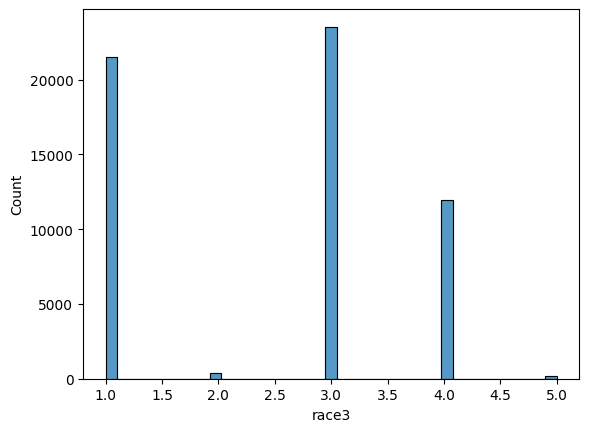

In [5]:
sns.histplot(data = full, x = "race3")


Text(0.5, 1.0, 'Readmission rate by race')

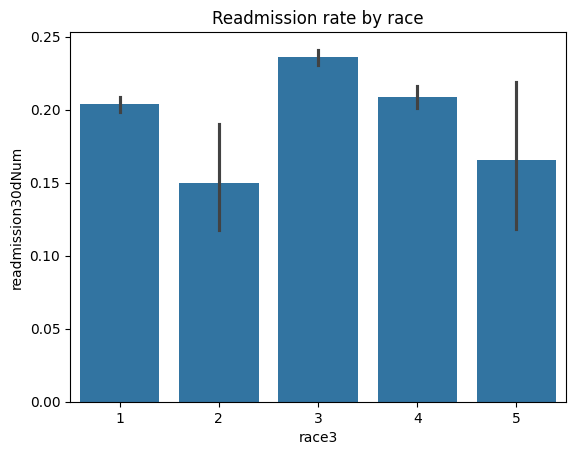

In [6]:
sns.barplot(data = full, x = "race3", y = "readmission30dNum").set_title('Readmission rate by race')


In [7]:
y_train = full.readmission30dNum
print(y_train.info())

x_train = full.copy()
print(x_train.info())

x_train.drop(['id', 'race3', 'readmission30dNum'], axis=1, inplace=True)
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
print(x_train.info())
print(x_train.head())

<class 'pandas.core.series.Series'>
RangeIndex: 57528 entries, 0 to 57527
Series name: readmission30dNum
Non-Null Count  Dtype
--------------  -----
57528 non-null  int64
dtypes: int64(1)
memory usage: 449.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57528 entries, 0 to 57527
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   57528 non-null  int64  
 1   race3                57528 non-null  int64  
 2   s.age                57528 non-null  float64
 3   sex_at_birthFemale   57528 non-null  int64  
 4   sex_at_birthMale     57528 non-null  int64  
 5   race3White_EA        57528 non-null  int64  
 6   race3Asian           57528 non-null  int64  
 7   race3Black_AA        57528 non-null  int64  
 8   race3HL              57528 non-null  int64  
 9   race3MENA            57528 non-null  int64  
 10  hcType1Private       57528 non-null  int64  
 11  hcType1Public       

In [8]:
y_val = holdout.readmission30dNum
print(y_val.info())
x_val = holdout.copy()
print(x_val.info())

x_val.drop(['id', 'race3', 'readmission30dNum'], axis=1, inplace=True)

x_val = pd.DataFrame(scaler.fit_transform(x_val), columns=x_val.columns)
print(x_val.info())
print(x_val.head())

<class 'pandas.core.series.Series'>
RangeIndex: 24660 entries, 0 to 24659
Series name: readmission30dNum
Non-Null Count  Dtype
--------------  -----
24660 non-null  int64
dtypes: int64(1)
memory usage: 192.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24660 entries, 0 to 24659
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   24660 non-null  int64  
 1   race3                24660 non-null  int64  
 2   s.age                24660 non-null  float64
 3   sex_at_birthFemale   24660 non-null  int64  
 4   sex_at_birthMale     24660 non-null  int64  
 5   race3White_EA        24660 non-null  int64  
 6   race3Asian           24660 non-null  int64  
 7   race3Black_AA        24660 non-null  int64  
 8   race3HL              24660 non-null  int64  
 9   race3MENA            24660 non-null  int64  
 10  hcType1Private       24660 non-null  int64  
 11  hcType1Public       

In [9]:
#x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

## Logistic regression

In [10]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

Train/Test split results:
LogisticRegression accuracy is 0.783
LogisticRegression log_loss is 0.499
LogisticRegression auc is 0.650


/var/folders/p2/kkyd0gbx0s5_9mbwn8jt2msc0000gq/T/ipykernel_65367/1680362613.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
/var/folders/p2/kkyd0gbx0s5_9mbwn8jt2msc0000gq/T/ipykernel_65367/1680362613.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')


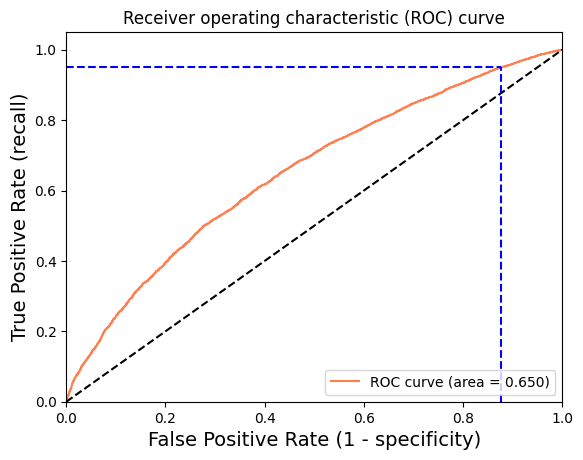

Using a threshold of 0.112 guarantees a sensitivity of 0.950 and a specificity of 0.124, i.e. a false positive rate of 87.58%.


In [11]:
# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
y_pred_proba = logreg.predict_proba(x_val)[:, 1]
[fpr, tpr, thr] = roc_curve(y_val, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_val, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_val, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

## Random forest

In [12]:
start_time = time.time()
model_rf = RandomForestClassifier(n_estimators = 100,max_depth=3)
model_rf = model_rf.fit(x_train, y_train)
start_pred_time = time.time()
predictions = model_rf.predict(x_val)
end_pred_time = time.time()
rf_val_acc = accuracy_score(y_val, predictions)
print('RandomForestClassifier validation accuracy', rf_val_acc)

end_time = time.time()
print("Execution time: ", end_time - start_time, "secs")
print("Prediction time:", end_pred_time - start_pred_time, "secs")

RandomForestClassifier validation accuracy 0.7826439578264396
Execution time:  0.8330729007720947 secs
Prediction time: 0.05206894874572754 secs


## XGBoost

In [13]:
x_train_xgb=x_train.values
x_val_xgb=x_val.values
y_train_xgb=y_train.values
y_val_xgb=y_val.values
negative_cases = sum(y_train == 0)
postive_cases = sum(y_train == 1)
ratio_posneg=negative_cases/postive_cases
print(ratio_posneg)
print(np.linspace(start=1, stop=ratio_posneg, num=3))

3.601503759398496
[1.         2.30075188 3.60150376]


In [14]:
start_time = time.time()
model_xgb = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.05,early_stopping_rounds=10,objective = "binary:logistic",
                             scale_pos_weight=ratio_posneg)
# Add silent=True to avoid printing out updates with each cycle
model_xgb.fit(x_train_xgb, y_train_xgb, verbose=False,
             eval_set=[(x_val_xgb, y_val_xgb)])
from sklearn.metrics import confusion_matrix, mean_squared_error
predictions = model_xgb.predict(x_val_xgb)
print(confusion_matrix(y_val_xgb, predictions))
print('XGBoost validation accuracy', accuracy_score(y_val_xgb, predictions))

end_time = time.time()
print("Execution time: ", end_time - start_time, "secs")
print("Prediction time:", end_pred_time - start_pred_time, "secs")

[[12100  7200]
 [ 2205  3155]]
XGBoost validation accuracy 0.6186131386861314
Execution time:  0.20307397842407227 secs
Prediction time: 0.05206894874572754 secs


In [15]:
from sklearn.model_selection import GridSearchCV

print("Parameter optimization")
xgb_model2 = xgb.XGBRegressor(n_jobs=1)
clf = GridSearchCV(
    xgb_model2,
    {"learning_rate":[0.01,0.05,0.1],
     "max_depth": [2, 3, 4],
     "n_estimators": [50, 100,1000],
     "scale_pos_weight":np.linspace(start=1, stop=ratio_posneg, num=3)},
    verbose=1,
    n_jobs=1,
    cv=3,
)
clf.fit(x_train_xgb, y_train_xgb, verbose=False,
             eval_set=[(x_val_xgb, y_val_xgb)])
print(clf.best_score_)
print(clf.best_params_)

Parameter optimization
Fitting 3 folds for each of 81 candidates, totalling 243 fits
-0.13710927963256836
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50, 'scale_pos_weight': 1.0}


XGBoost validation accuracy 0.6232360097323602
Execution time:  0.17010974884033203 secs
Prediction time: 0.05206894874572754 secs


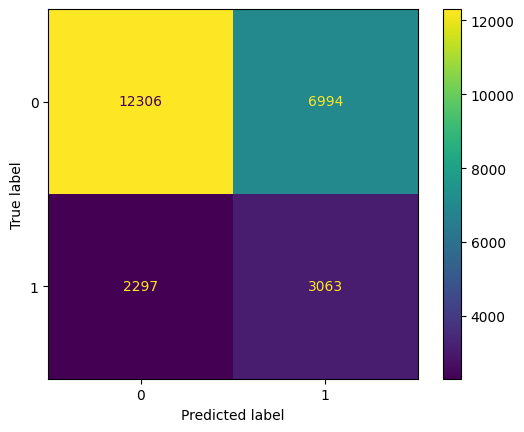

In [16]:
start_time = time.time()
model_xgb = xgb.XGBClassifier(n_estimators=50, learning_rate=0.01,max_depth=4,
                              early_stopping_rounds=10,
                              objective = "binary:logistic",
                              scale_pos_weight=ratio_posneg)
# Add silent=True to avoid printing out updates with each cycle
model_xgb.fit(x_train_xgb, y_train_xgb, verbose=False,
             eval_set=[(x_val_xgb, y_val_xgb)])
from sklearn.metrics import confusion_matrix, mean_squared_error
predictions = model_xgb.predict(x_val_xgb)
#print(confusion_matrix(y_val_xgb, predictions))
cm=confusion_matrix(y_val_xgb, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print('XGBoost validation accuracy', accuracy_score(y_val_xgb, predictions))
end_time = time.time()
print("Execution time: ", end_time - start_time, "secs")
print("Prediction time:", end_pred_time - start_pred_time, "secs")

## DL: TapFPN

In [ ]:
start_time = time.time()
model_dl = TabPFNClassifier(device="cpu")
model_dl = model_dl.fit(x_train, y_train,overwrite_warning=True)
start_pred_time = time.time()
predictions = model_dl.predict(x_val.to_numpy())
end_pred_time = time.time()
tpfn_val_acc = accuracy_score(y_val, predictions)

print('TabPFNClassifier validation accuracy', tpfn_val_acc)

end_time = time.time()
print("Execution time: ", end_time - start_time, "secs")
print("Prediction time:", end_pred_time - start_pred_time, "secs")

## Conclusions

Very similar results for all three classifiers. It might be well suited to test on the AoU dataset and more evident imbalanced datasets.

## References

[1] Léo Grinsztajn, Edouard Oyallon, Gaël Varoquaux. Why do tree-based models still outperform deep learning on tabular data? https://arxiv.org/abs/2207.08815

[2] Noah Hollmann, Samuel Müller, Katharina Eggensperger, Frank Hutter. TabPFN: A Transformer That Solves Small Tabular Classification Problems in a Second. ICLR 2023. https://arxiv.org/abs/2207.01848